In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pickle
from tflearning.data.creator import create_datasetgenerator, DataConfig
import numpy as np
from omegaconf import OmegaConf
from dacite import from_dict
from ml_utilities.data.data_utils import show_image_grid, show_images

In [2]:
flowers_path = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-flowers102-resnet18--230317_153444/prediction_depth_results.p')

In [3]:
def load_dict(file):
    with open(file, 'rb') as f:
        return pickle.load(f)

In [4]:
pd_flowers = load_dict(flowers_path)
pd_flowers['train'].keys()

dict_keys(['layer_accs', 'pred_depths', 'layer_preds', 'labels', 'num_classes', 'entropies'])

In [5]:
len(pd_flowers['train']['entropies'])

1020

In [6]:
dcfg = DataConfig(name='flowers102', kwargs={'data_root_path': '/system/user/beck/pwbeck/data', 'n_px': 224})
dsgen_flowers = create_datasetgenerator(data_cfg=dcfg)
dsgen_flowers.generate_dataset()

/system/apps/userenv/beck/subspaces/lib/python3.10/site-packages/torchvision/transforms/transforms.py:891: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/system/apps/userenv/beck/subspaces/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [7]:
dsgen_flowers.train_split

Dataset Flowers102
    Number of datapoints: 1020
    Root location: /system/user/beck/pwbeck/data
    split=train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
               <function _convert_to_rgb at 0x7f642bd2b400>
               ToTensor()
               Normalize(mean=[0.4329557418823242, 0.38192424178123474, 0.2964075207710266], std=[0.2588456869125366, 0.20939205586910248, 0.22115884721279144])
           )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

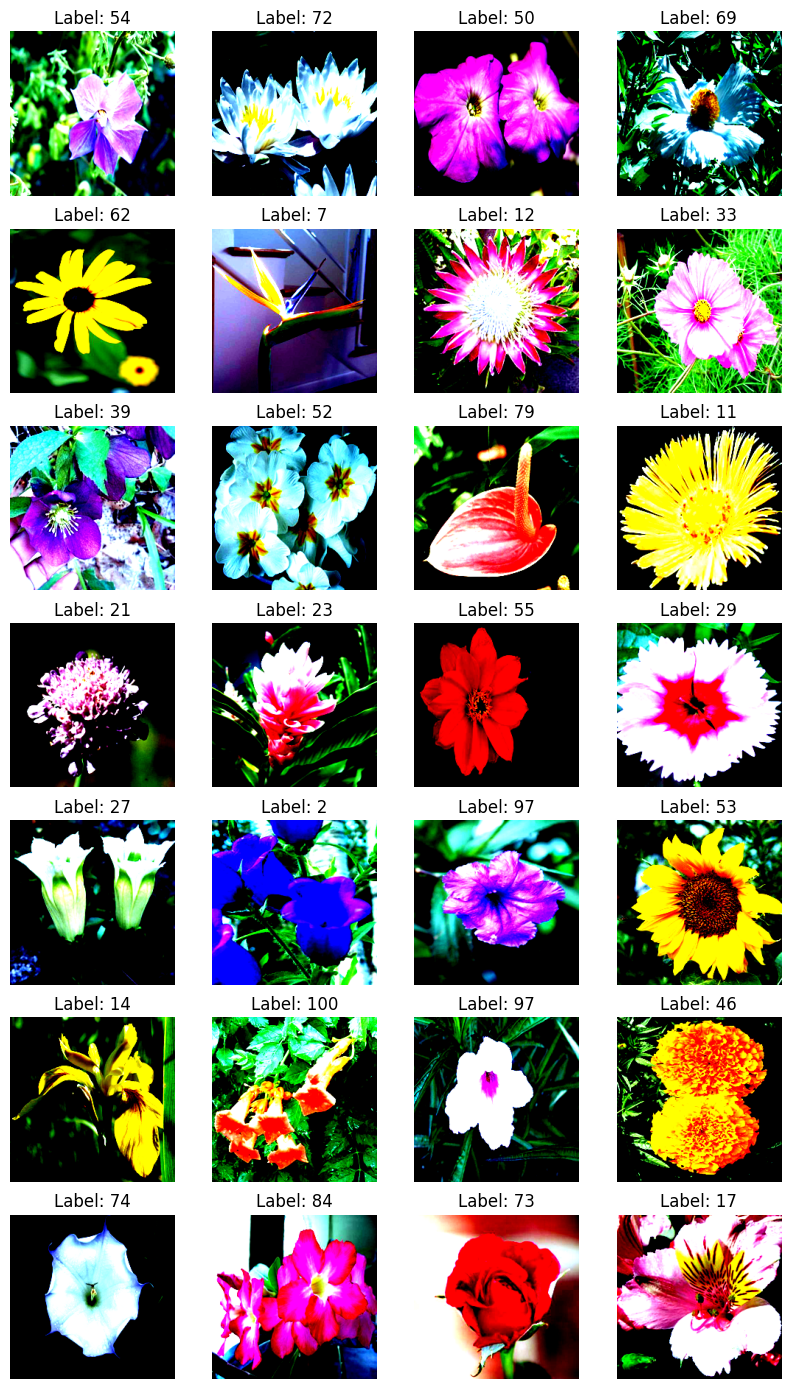

In [11]:
data_cfg = """
data:
  name: flowers102
  kwargs:
    data_root_path: /system/user/beck/pwbeck/data
    n_px: 224
#   sample_selector:
#     name: prediction_depth
#     kwargs:
#       fraction: 0.01
#       pred_results_file: /system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-flowers102-resnet18--230317_153444/prediction_depth_results.p
#       keep_highest: True
"""
data_cfg = OmegaConf.create(data_cfg)
data_cfg = from_dict(data=OmegaConf.to_container(data_cfg.data), data_class=DataConfig)
dsgen_flowers = create_datasetgenerator(data_cfg=data_cfg)
dsgen_flowers.generate_dataset()
show_images(dsgen_flowers.train_split, num_images=30, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

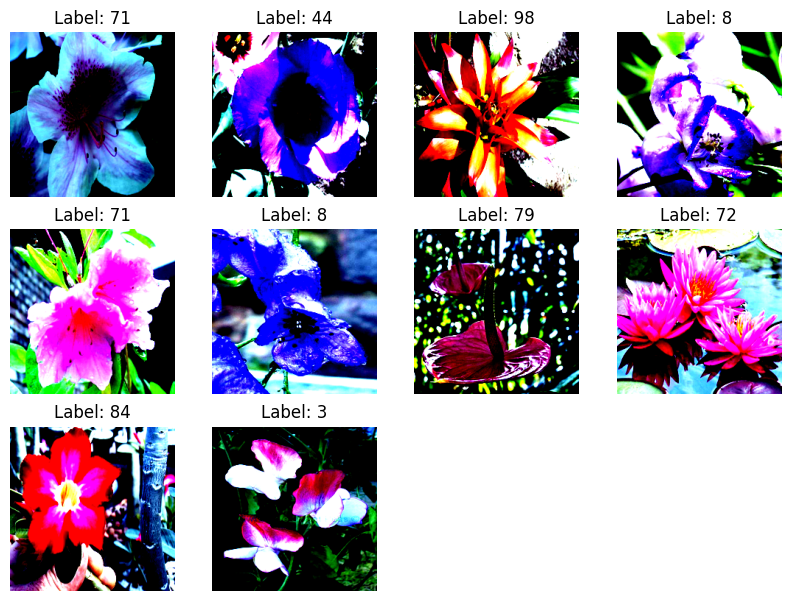

In [10]:
data_cfg = """
data:
  name: flowers102
  kwargs:
    data_root_path: /system/user/beck/pwbeck/data
    n_px: 224
  sample_selector:
    name: prediction_depth
    kwargs:
      fraction: 0.01
      pred_results_file: /system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-flowers102-resnet18--230317_153444/prediction_depth_results.p
      keep_highest: True
"""
data_cfg = OmegaConf.create(data_cfg)
data_cfg = from_dict(data=OmegaConf.to_container(data_cfg.data), data_class=DataConfig)
dsgen_flowers = create_datasetgenerator(data_cfg=data_cfg)
dsgen_flowers.generate_dataset()
show_images(dsgen_flowers.train_split, num_images=30)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

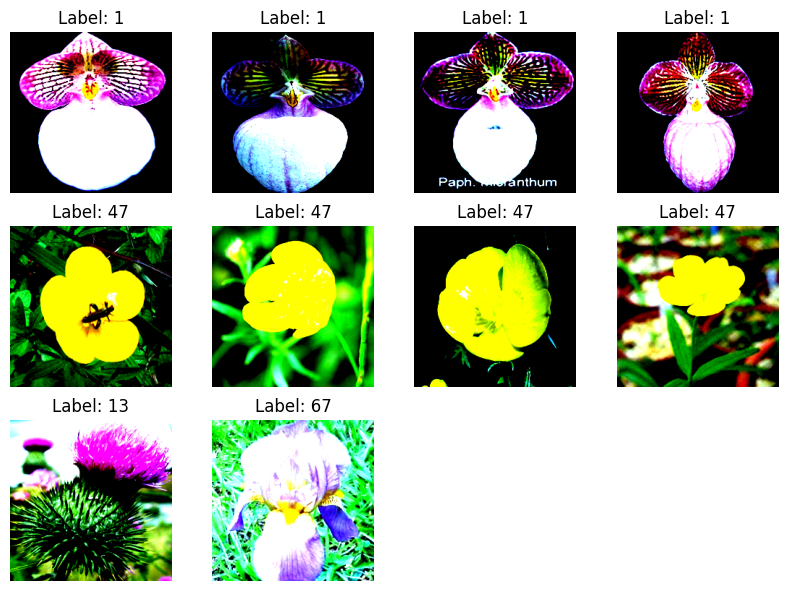

In [46]:
data_cfg = """
data:
  name: flowers102
  kwargs:
    data_root_path: /system/user/beck/pwbeck/data
    n_px: 224
  sample_selector:
    name: prediction_depth
    kwargs:
      fraction: 0.01
      pred_results_file: /system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-flowers102-resnet18--230317_153444/prediction_depth_results.p
      keep_highest: False
"""
data_cfg = OmegaConf.create(data_cfg)
data_cfg = from_dict(data=OmegaConf.to_container(data_cfg.data), data_class=DataConfig)
dsgen_flowers = create_datasetgenerator(data_cfg=data_cfg)
dsgen_flowers.generate_dataset()
show_images(dsgen_flowers.train_split, num_images=100)

In [23]:
data_cfg = """
data:
  name: cifar10
  kwargs:
    data_root_path: /system/user/beck/pwbeck/data
    n_px: 224
  sample_selector:
    name: prediction_depth
    kwargs:
      fraction: 0.2
    #   restrict_n_samples: 100
      pred_results_file: /system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-cifar10_resnet18-pretrained--230317_124927/prediction_depth_results.p
      keep_highest: True
"""
data_cfg = OmegaConf.create(data_cfg)
data_cfg = from_dict(data=OmegaConf.to_container(data_cfg.data), data_class=DataConfig)
cf10gen = create_datasetgenerator(data_cfg=data_cfg)
cf10gen.generate_dataset()

Files already downloaded and verified
Files already downloaded and verified


In [24]:
len(cf10gen.train_split), len(cf10gen.val_split)

(10000, 10000)